In [1]:
# Conectar google colab a Drive
from google.colab import drive
drive.mount('/MyDrive/')

Drive already mounted at /MyDrive/; to attempt to forcibly remount, call drive.mount("/MyDrive/", force_remount=True).


In [2]:
#Cargado de datos
import csv
import pandas as pd
import numpy as np
import io
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [3]:
#Cargar datos de Hospitalizados
df_SEG_COV_pred = pd.read_csv('/MyDrive/MyDrive/TB_SEGUIM_COVID19_preprocesado.csv', encoding='utf8', delimiter=',')

In [4]:
df_SEG_COV_pred.head(100)

,evolucion_alta_1,evolucion_defuncion_1,evolucion_desfavorable_1,evolucion_estacionario_1,evolucion_favorable_1,evolucion_referido_1,con_oxigeno_1,con_ventilacion_1,esta_uci_1,esta_ucin_1,...,evolucion_alta_4,evolucion_defuncion_4,evolucion_desfavorable_4,evolucion_estacionario_4,evolucion_favorable_4,evolucion_referido_4,con_oxigeno_4,con_ventilacion_4,esta_uci_4,esta_ucin_4
0,False,False,True,False,False,False,1,0,0,0,...,True,False,False,False,False,False,1,0,0,0
1,False,False,False,True,False,False,1,0,0,0,...,True,False,False,False,False,False,1,0,0,0
2,False,False,True,False,False,False,0,0,0,0,...,False,True,False,False,False,False,1,0,0,0
3,False,False,True,False,False,False,1,0,0,0,...,True,False,False,False,False,False,1,0,0,0
4,False,False,False,False,True,False,1,0,0,0,...,True,False,False,False,False,False,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,True,False,False,1,0,0,0,...,False,True,False,False,False,False,1,0,0,0
96,False,False,False,False,True,False,0,0,0,0,...,True,False,False,False,False,False,0,0,0,0
97,False,False,False,True,False,False,1,0,0,0,...,True,False,False,False,False,False,0,0,0,0
98,False,False,False,True,False,False,0,0,0,0,...,True,False,False,False,False,False,0,0,0,0


In [5]:
for col in df_SEG_COV_pred.columns:
  print(col)

evolucion_alta_1
evolucion_defuncion_1
evolucion_desfavorable_1
evolucion_estacionario_1
evolucion_favorable_1
evolucion_referido_1
con_oxigeno_1
con_ventilacion_1
esta_uci_1
esta_ucin_1
evolucion_alta_2
evolucion_defuncion_2
evolucion_desfavorable_2
evolucion_estacionario_2
evolucion_favorable_2
evolucion_referido_2
con_oxigeno_2
con_ventilacion_2
esta_uci_2
esta_ucin_2
evolucion_alta_3
evolucion_defuncion_3
evolucion_desfavorable_3
evolucion_estacionario_3
evolucion_favorable_3
evolucion_referido_3
con_oxigeno_3
con_ventilacion_3
esta_uci_3
esta_ucin_3
evolucion_alta_4
evolucion_defuncion_4
evolucion_desfavorable_4
evolucion_estacionario_4
evolucion_favorable_4
evolucion_referido_4
con_oxigeno_4
con_ventilacion_4
esta_uci_4
esta_ucin_4


In [14]:
from sklearn.cluster import KMeans

features = df_SEG_COV_pred[[
    'evolucion_alta_1', 'evolucion_defuncion_1', 'evolucion_desfavorable_1', 'evolucion_estacionario_1', 'evolucion_favorable_1', 'evolucion_referido_1',
    'con_oxigeno_1', 'con_ventilacion_1', 'esta_uci_1', 'esta_ucin_1',
    'evolucion_alta_2', 'evolucion_defuncion_2', 'evolucion_desfavorable_2', 'evolucion_estacionario_2', 'evolucion_favorable_2', 'evolucion_referido_2',
    'con_oxigeno_2', 'con_ventilacion_2', 'esta_uci_2', 'esta_ucin_2',
    'evolucion_alta_3', 'evolucion_defuncion_3', 'evolucion_desfavorable_3', 'evolucion_estacionario_3', 'evolucion_favorable_3', 'evolucion_referido_3',
    'con_oxigeno_3', 'con_ventilacion_3', 'esta_uci_3', 'esta_ucin_3',
    'evolucion_alta_4', 'evolucion_defuncion_4', 'evolucion_desfavorable_4', 'evolucion_estacionario_4', 'evolucion_favorable_4', 'evolucion_referido_4',
    'con_oxigeno_4', 'con_ventilacion_4', 'esta_uci_4', 'esta_ucin_4'
]]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

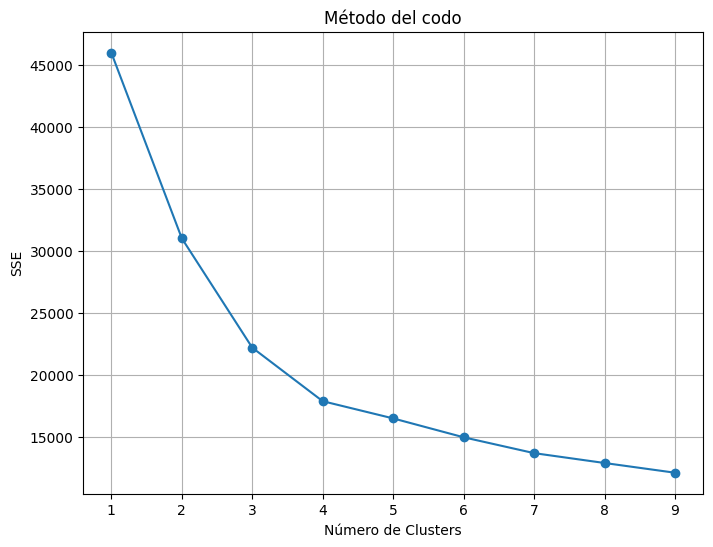

Número de clusters: 1, SSE: 45997.042694867385
Número de clusters: 2, SSE: 31027.510377679784
Número de clusters: 3, SSE: 22202.901743979703
Número de clusters: 4, SSE: 17884.237519137285
Número de clusters: 5, SSE: 16495.76068700442
Número de clusters: 6, SSE: 14972.932152520982
Número de clusters: 7, SSE: 13693.945591428563
Número de clusters: 8, SSE: 12898.31686980135
Número de clusters: 9, SSE: 12113.58396286265


In [13]:
import matplotlib.pyplot as plt

# Método del codo para encontrar numero de clusters
sse = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)

# Graficar método del codo
plt.figure(figsize=(8, 6))
plt.plot(K, sse, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.title('Método del codo')
plt.grid(True)
plt.xticks(K)
plt.show()

# Imprimir valores
for k, score in zip(K, sse):
    print(f'Número de clusters: {k}, SSE: {score}')